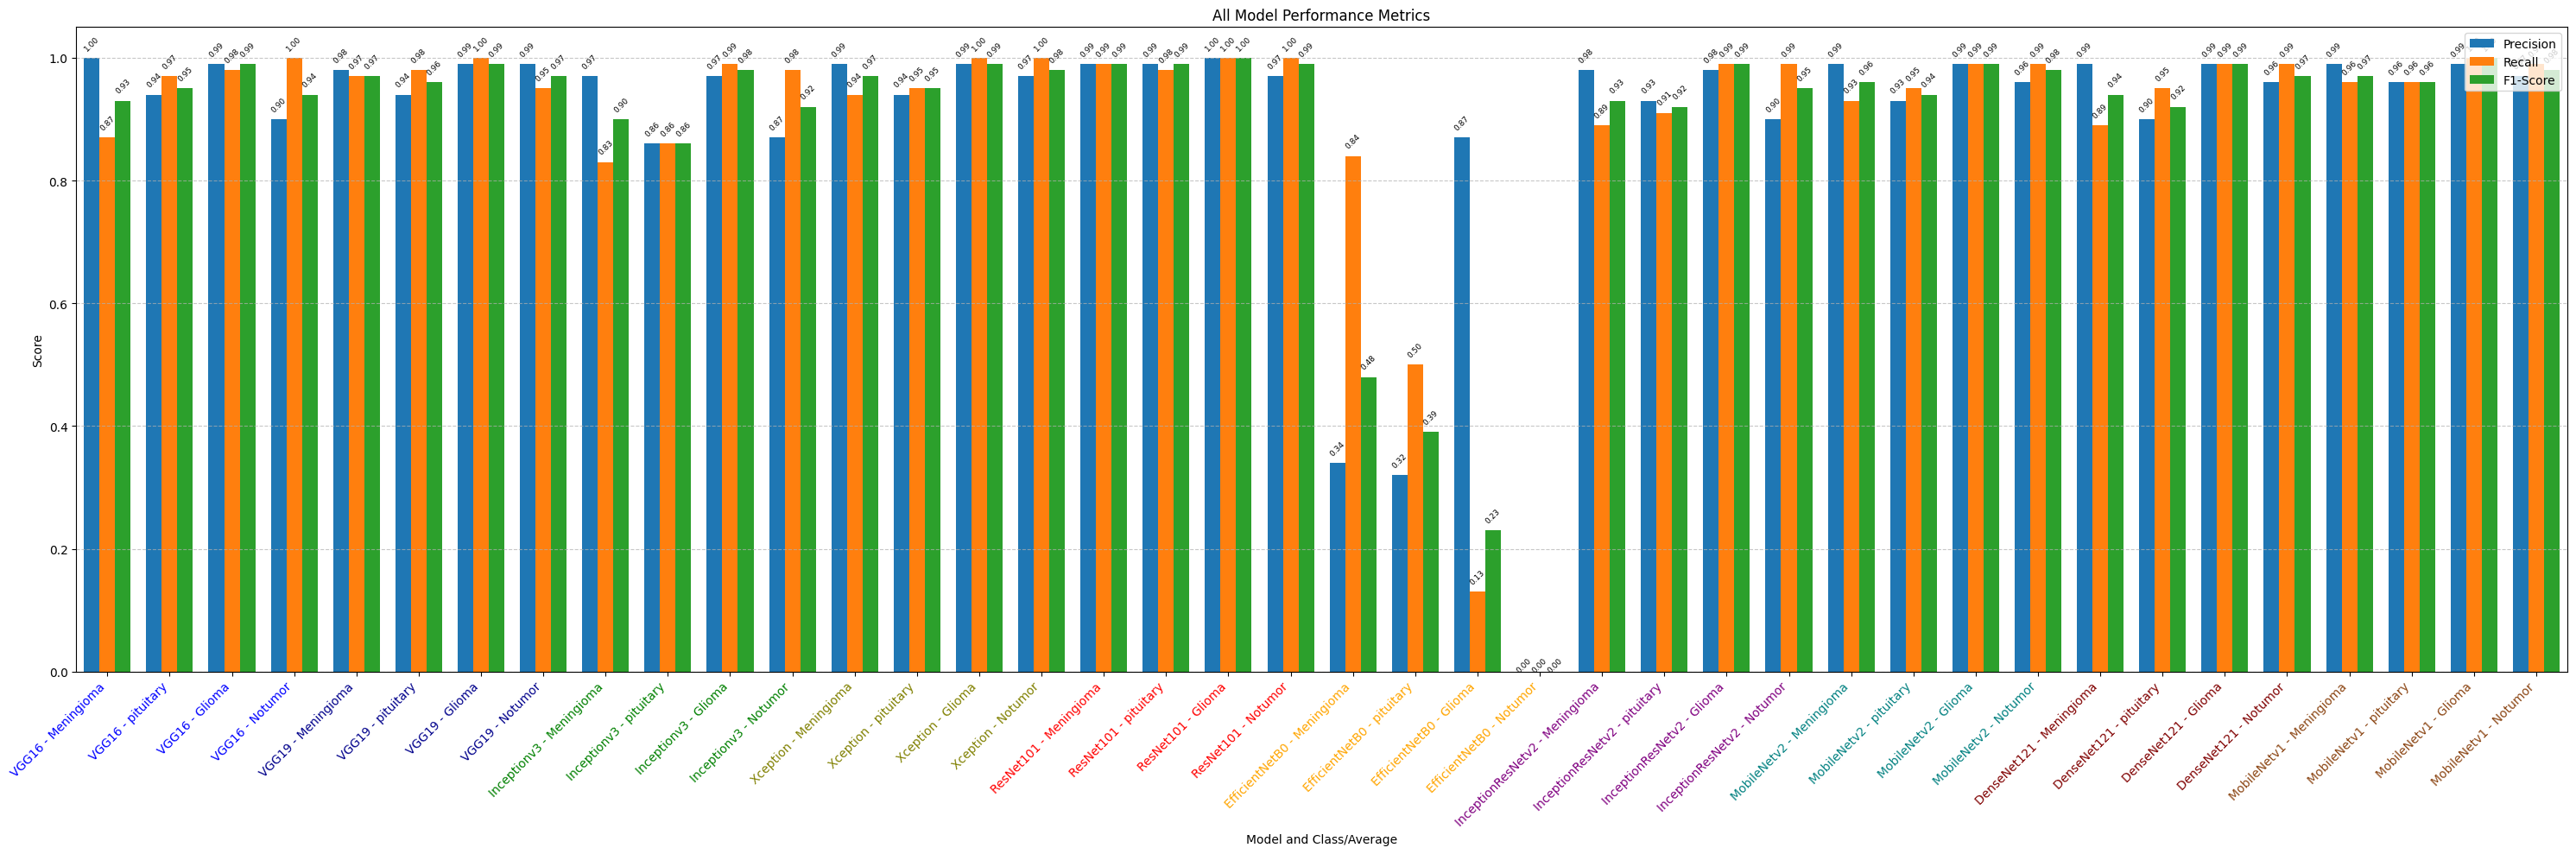

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Complete and consolidated dataset (10 models * 4 classes = 40 entries)
data = {
    'Name of Model': [
        'VGG16', 'VGG16', 'VGG16', 'VGG16',
        'VGG19', 'VGG19', 'VGG19', 'VGG19',
        'Inceptionv3', 'Inceptionv3', 'Inceptionv3', 'Inceptionv3',
        'Xception', 'Xception', 'Xception', 'Xception',
        'ResNet101', 'ResNet101', 'ResNet101', 'ResNet101',
        'EfficientNetB0', 'EfficientNetB0', 'EfficientNetB0', 'EfficientNetB0',
        'InceptionResNetv2', 'InceptionResNetv2', 'InceptionResNetv2', 'InceptionResNetv2',
        'MobileNetv2', 'MobileNetv2', 'MobileNetv2', 'MobileNetv2',
        'DenseNet121', 'DenseNet121', 'DenseNet121', 'DenseNet121',
        'MobileNetv1', 'MobileNetv1', 'MobileNetv1', 'MobileNetv1'
    ],
    'Class/Average': [
        'Meningioma', 'pituitary', 'Glioma', 'Notumor',
        'Meningioma', 'pituitary', 'Glioma', 'Notumor',
        'Meningioma', 'pituitary', 'Glioma', 'Notumor',
        'Meningioma', 'pituitary', 'Glioma', 'Notumor',
        'Meningioma', 'pituitary', 'Glioma', 'Notumor',
        'Meningioma', 'pituitary', 'Glioma', 'Notumor',
        'Meningioma', 'pituitary', 'Glioma', 'Notumor',
        'Meningioma', 'pituitary', 'Glioma', 'Notumor',
        'Meningioma', 'pituitary', 'Glioma', 'Notumor',
        'Meningioma', 'pituitary', 'Glioma', 'Notumor'
    ],
    'Precision': [
        1.00, 0.94, 0.99, 0.90, 0.98, 0.94, 0.99, 0.99, 0.97, 0.86, 0.97, 0.87, 0.99, 0.94, 0.99, 0.97,
        0.99, 0.99, 1.00, 0.97, 0.34, 0.32, 0.87, 0.00, 0.98, 0.93, 0.98, 0.90, 0.99, 0.93, 0.99, 0.96,
        0.99, 0.90, 0.99, 0.96, 0.99, 0.96, 0.99, 0.97
    ],
    'Recall': [
        0.87, 0.97, 0.98, 1.00, 0.97, 0.98, 1.00, 0.95, 0.83, 0.86, 0.99, 0.98, 0.94, 0.95, 1.00, 1.00,
        0.99, 0.98, 1.00, 1.00, 0.84, 0.50, 0.13, 0.00, 0.89, 0.91, 0.99, 0.99, 0.93, 0.95, 0.99, 0.99,
        0.89, 0.95, 0.99, 0.99, 0.96, 0.96, 1.00, 0.99
    ],
    'F1-Score': [
        0.93, 0.95, 0.99, 0.94, 0.97, 0.96, 0.99, 0.97, 0.90, 0.86, 0.98, 0.92, 0.97, 0.95, 0.99, 0.98,
        0.99, 0.99, 1.00, 0.99, 0.48, 0.39, 0.23, 0.00, 0.93, 0.92, 0.99, 0.95, 0.96, 0.94, 0.99, 0.98,
        0.94, 0.92, 0.99, 0.97, 0.97, 0.96, 1.00, 0.98
    ],
    'Support': [
        300, 306, 405, 300, 300, 306, 405, 300, 300, 306, 405, 300, 300, 306, 405, 300,
        300, 306, 405, 300, 300, 306, 405, 300, 300, 306, 405, 300, 300, 306, 405, 300,
        300, 306, 405, 300, 300, 306, 405, 300
    ]
}
df = pd.DataFrame(data)

# Create a combined label for the X-axis
df['Model-Class'] = df['Name of Model'] + ' - ' + df['Class/Average']

# Prepare data for plotting
labels = df['Model-Class']
precision = df['Precision']
recall = df['Recall']
f1_score = df['F1-Score']

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(30, 10))

# Plotting the grouped bars
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Function to add data labels on top of the bars
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        if height > 0.1:
             y_pos = height
             offset = 5
             va = 'bottom'
        else:
             y_pos = height + 0.01
             offset = 0
             va = 'center'

        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, y_pos),
                    xytext=(0, offset),
                    textcoords="offset points",
                    ha='center', va=va,
                    fontsize=6.5, rotation=45)

# Add labels to all bar groups
autolabel(rects1, ax)
autolabel(rects2, ax)
autolabel(rects3, ax)

# Setting labels, title, and ticks
ax.set_ylabel('Score')
ax.set_xlabel('Model and Class/Average')
ax.set_title('All Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")

# Define model colors
model_colors = {
    'VGG16': 'blue', 'VGG19': 'darkblue', 'Inceptionv3': 'green',
    'Xception': 'olive', 'ResNet101': 'red', 'EfficientNetB0': 'orange',
    'InceptionResNetv2': 'purple', 'MobileNetv2': 'teal', 'DenseNet121': 'maroon',
    'MobileNetv1': 'saddlebrown'
}
model_names = df['Name of Model']

# Color the x-tick labels based on the model name
for i, tick_label in enumerate(ax.get_xticklabels()):
    model = model_names.iloc[i]
    color = model_colors[model]
    tick_label.set_color(color)

# Set x-limits to remove the excess whitespace on the left and right
ax.set_xlim(-0.5, 39.5)

ax.legend(loc='upper right')
ax.set_ylim(0.0, 1.05)
ax.grid(axis='y', linestyle='--', alpha=0.7)

fig.tight_layout()
plt.savefig('model_performance_grouped_bar_chart_v7_trimmed.png')